In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import json


paths = [
    "experiments/results/basic_chunks_add_bge_instruction_normTrue_cosine_n14681_20250806_102946/results_basic_chunks_add_bge_instruction_normTrue_cosine_n14681_20250806_102946.json",
    "experiments/results/basic_chunks_add_bge_prev_3_normTrue_cosine_n14681_20250806_121143/results_basic_chunks_add_bge_prev_3_normTrue_cosine_n14681_20250806_121143.json",
    "experiments/results/basic_contributions_add_bge_instruction_normTrue_cosine_n14681_20250806_133301/results_basic_contributions_add_bge_instruction_normTrue_cosine_n14681_20250806_133301.json",
    "experiments/results/basic_contributions_add_bge_prev_3_normTrue_cosine_n14681_20250806_140639/results_basic_contributions_add_bge_prev_3_normTrue_cosine_n14681_20250806_140639.json",
    "experiments/results/50-50_contributions_add_bge_prev_3_normTrue_cosine_n14681_20250806_154012/results_50-50_contributions_add_bge_prev_3_normTrue_cosine_n14681_20250806_154012.json",
    "experiments/results/basic_chunks_add_bge_prev_3_normTrue_cosine_n14681_20250806_175620/results_basic_chunks_add_bge_prev_3_normTrue_cosine_n14681_20250806_175620.json",
]

names = [
    "chunks",
    "chunks+prev3",
    "contributions",
    "contributions+prev3",
    "chunks+contributions+prev3 (50/50)",
    "chunks+fusion"
]

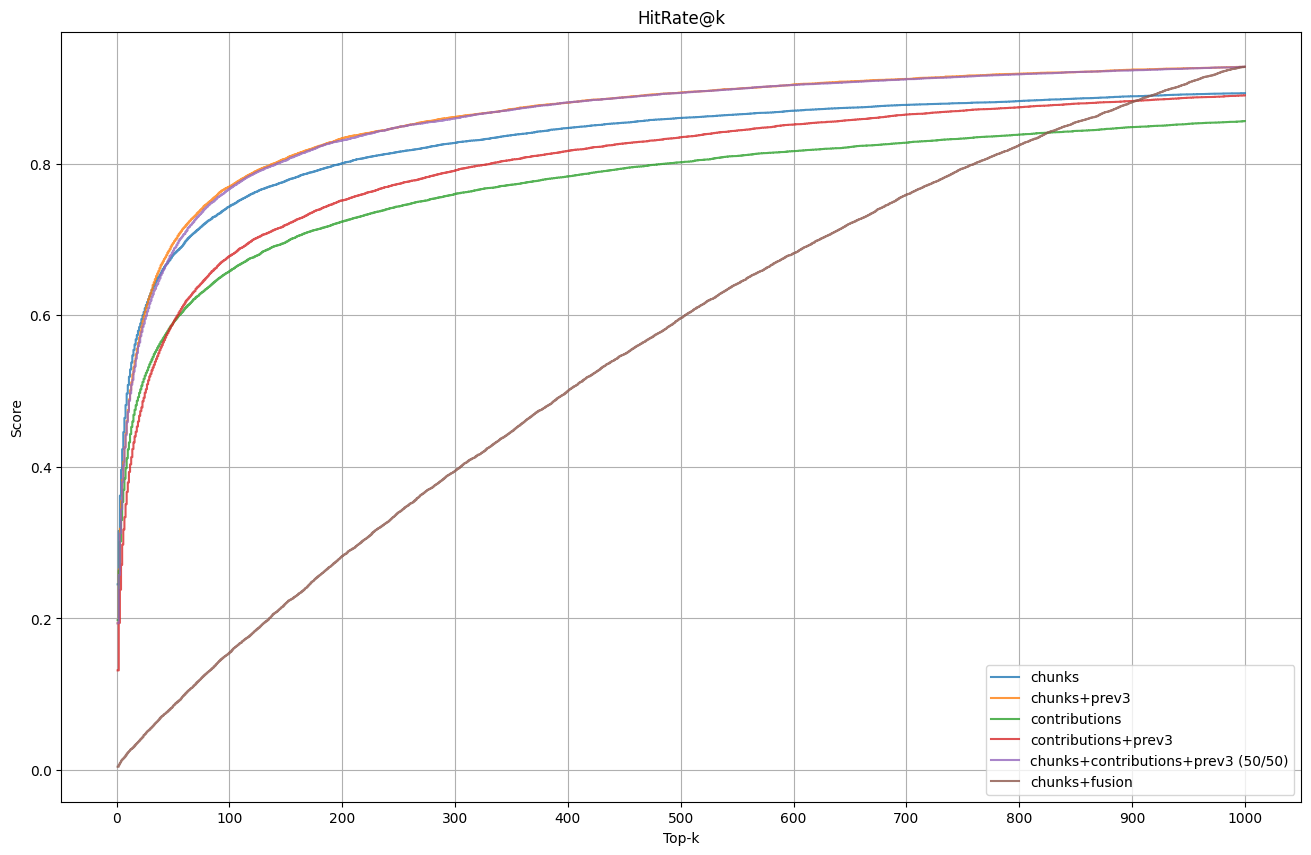

In [12]:
k_values = [k for k in range(1, 1001)]

# Make a plot of the average hit rates (y-axis) and IoU (Jaccard) vs. top-k (x-axis)
plt.figure(figsize=(16, 10))
for path, name in zip(paths, names):
    with open(path, "r") as f:
        data = json.load(f)
    plt.plot(k_values, data["average_hit_rates"], drawstyle="steps-post", linestyle="-", lw=1.5, alpha=0.8, label=name)
plt.xlabel("Top-k")
plt.ylabel("Score")
plt.title("HitRate@k")
plt.legend()
plt.grid()

# Set x-ticks every 100
plt.gca().xaxis.set_major_locator(MultipleLocator(100))

plt.show()

In [8]:
plt.savefig(f"k1000.png")
plt.close()

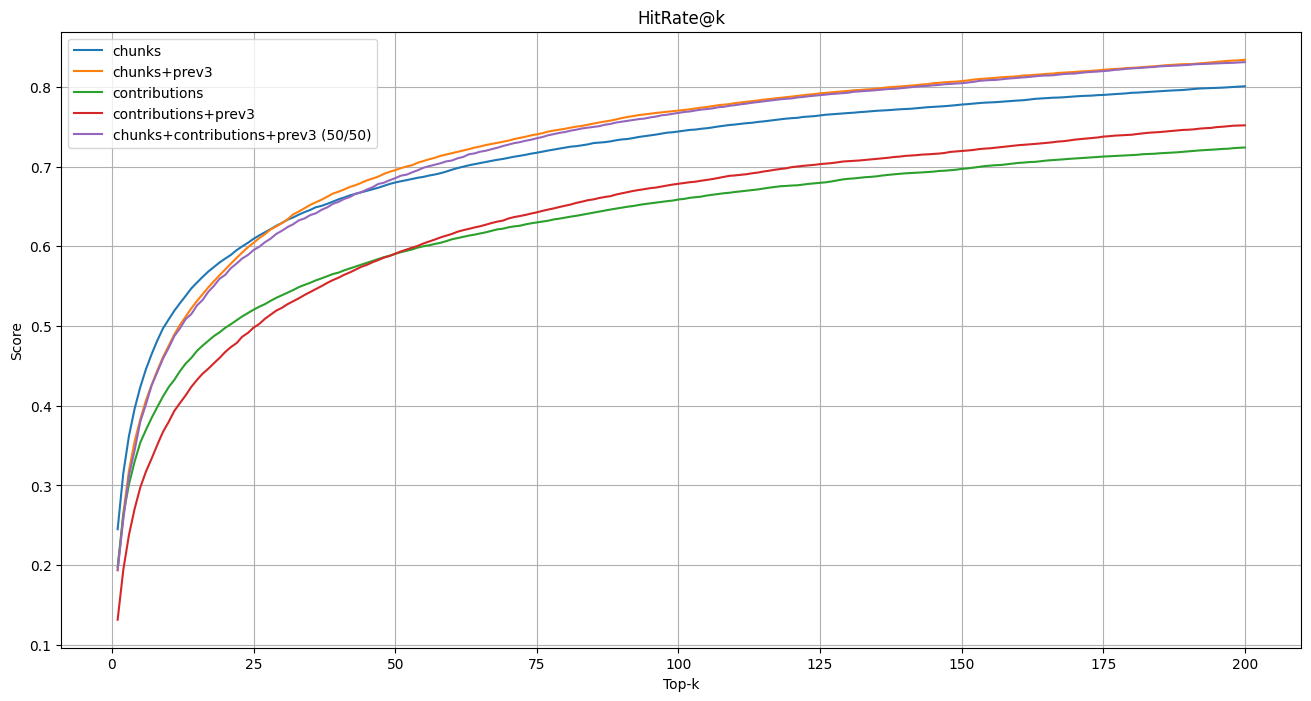

In [9]:
k_values = [k for k in range(1, 201)]

chunk_data = None
with open(paths[0], "r") as f:
    chunk_data = json.load(f)
contribution_data = None
with open(paths[1], "r") as f:
    contribution_data = json.load(f)

# Make a plot of the average hit rates (y-axis) and IoU (Jaccard) vs. top-k (x-axis)
plt.figure(figsize=(16, 8))
for path, name in zip(paths, names):
    with open(path, "r") as f:
        data = json.load(f)
    plt.plot(k_values, data["average_hit_rates"][:200], linestyle="-", label=name)
plt.xlabel("Top-k")
plt.ylabel("Score")
plt.title("HitRate@k")
plt.legend()
plt.grid()
plt.show()

In [10]:
plt.savefig(f"k200.png")
plt.close()